# Importing necessary Libraries

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv('/content/heart.csv')   ## Reading the csv file

In [38]:
df['thal'].value_counts()    ## Count of unique values

,count
thal,
2,544
3,410
1,64
0,7


In [39]:
df.columns    ## Number of columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [40]:
df[df['target']==1].head()          ## Print the columns where Patients has Heart Dieases

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1


In [41]:
df[['exang','cp','chol','thalach']].describe()      ## Printing Statistical Information

,exang,cp,chol,thalach
count,1025.000000,1025.000000,1025.00000,1025.000000
mean,0.336585,0.942439,246.00000,149.114146
std,0.472772,1.029641,51.59251,23.005724
min,0.000000,0.000000,126.00000,71.000000
25%,0.000000,0.000000,211.00000,132.000000
50%,0.000000,1.000000,240.00000,152.000000
75%,1.000000,2.000000,275.00000,166.000000
max,1.000000,3.000000,564.00000,202.000000


In [42]:
df['sex'].value_counts()

,count
sex,
1,713
0,312


In [43]:
df.info()                 ## Check for proper datatypes and Null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [44]:
## Male = 0                  female = 1
## has Heart Dis = 1         No Heart Dis = 0
a = df[(df['sex']==0) & (df['target']==0)].shape[0]
b = df[(df['sex']==0) & (df['target']==1)].shape[0]
c = df[(df['sex']==1) & (df['target']==0)].shape[0]
d = df[(df['sex']==1) & (df['target']==1)].shape[0]
print("Male without Heart Problem",a)
print("Male with Heart Problem",b)
print("Female without Heart Problem",c)
print("Female with Heart Problem",d)
print("Total Heart Patients",df['target'].value_counts()[1])
print("Total Non Heart Patients",df['target'].value_counts()[0])

Male without Heart Problem 86
Male with Heart Problem 226
Female without Heart Problem 413
Female with Heart Problem 300
Total Heart Patients 526
Total Non Heart Patients 499


# Visualing The dataset using Graphs

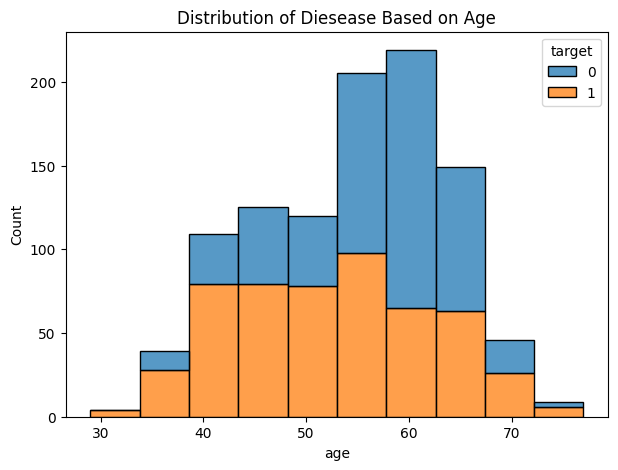

In [45]:
plt.figure(figsize=(7,5))
sns.histplot(df,x='age',hue='target',bins=10,multiple='stack')
plt.title('Distribution of Diesease Based on Age')
plt.show()
## Above Histogram plot shows count of heart diesease based on age

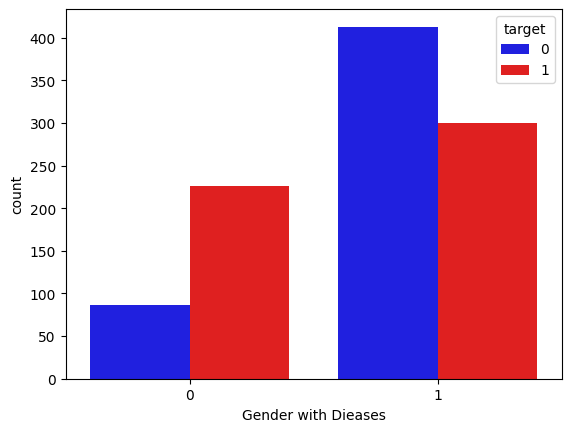

In [46]:
## Chest pain during Excersise = 'red'
## No Chest pain during Excersise = 'blue'

sns.countplot(df,x='sex',hue='target',palette=['blue','red'])
plt.xlabel('Gender with Dieases')
plt.show()

## above countplot shows person has heart diesease or not properly divided into male(0) and female(1)

# Training the Model

In [47]:
X = df.drop(columns='target')
X.head()

## Dividing the data in X (input columns) y (output columns)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [48]:
y = df['target']
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Spliting the data into train and test (80/20)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((820, 13), (205, 13), (820,), (205,))

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## MinMaxScaler() converts the data betwenn 0 and 1

In [52]:
X_test

array([[0.47916667, 1.        , 0.        , ..., 1.        , 0.25      ,
        0.66666667],
       [0.33333333, 0.        , 0.33333333, ..., 0.5       , 0.        ,
        0.66666667],
       [0.54166667, 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.1875    , 1.        , 0.66666667, ..., 1.        , 1.        ,
        0.66666667],
       [0.60416667, 0.        , 1.        , ..., 1.        , 0.        ,
        0.66666667],
       [0.41666667, 1.        , 0.66666667, ..., 1.        , 0.75      ,
        0.66666667]])

In [53]:
X_train

array([[0.45833333, 1.        , 0.66666667, ..., 1.        , 0.25      ,
        1.        ],
       [0.6875    , 0.        , 0.        , ..., 0.5       , 0.        ,
        0.66666667],
       [0.52083333, 1.        , 0.66666667, ..., 0.        , 0.25      ,
        0.66666667],
       ...,
       [0.16666667, 0.        , 0.66666667, ..., 1.        , 0.        ,
        0.66666667],
       [0.27083333, 1.        , 0.        , ..., 0.5       , 0.        ,
        0.33333333],
       [0.64583333, 1.        , 0.        , ..., 1.        , 0.5       ,
        1.        ]])

In [54]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train,y_train)

## Fitting the data in KNN with k=9 where model can learn patterns from the dataset

KNeighborsClassifier(n_neighbors=9)

In [55]:
from sklearn.metrics import accuracy_score

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

train_prediction = accuracy_score(y_train,y_train_pred)
test_prediction = accuracy_score(y_test,y_test_pred)

print("Train prediction :",train_prediction)
print("Test prediction :",test_prediction)

## Checking for the accuracy score

Train prediction : 0.8987804878048781
Test prediction : 0.8780487804878049


In [56]:
dic = {
    'age': 45,
    'sex': 1,
    'cp': 3,
    'trestbps': 200,
    'chol': 290,
    'fbs': 1,
    'restecg': 2,
    'thalach': 220,
    'exang': 0,
    'oldpeak': 5.5,
    'slope': 1,
    'ca': 2,
    'thal': 0
}

## Passing a random values to dataset to predict the outcomes

dic

{'age': 45,
 'sex': 1,
 'cp': 3,
 'trestbps': 200,
 'chol': 290,
 'fbs': 1,
 'restecg': 2,
 'thalach': 220,
 'exang': 0,
 'oldpeak': 5.5,
 'slope': 1,
 'ca': 2,
 'thal': 0}

In [57]:
def predict_diabetes(d):
    sample_data = pd.DataFrame([d])
    scaled_data = scaler.transform(sample_data)
    pred = classifier.predict(scaled_data)[0]
    prob = np.max(classifier.predict_proba(scaled_data)[0])
    return pred,prob

## above fuction converts the dictionery in dataframe
## tranform the data between (0-1)
## Predict weather patient has Dieaseas or Not
## Also returns Probability of prediction in %

In [58]:
pred,prob = predict_diabetes(dic)

In [59]:
print("Prediction : ",pred)
print("Probability : ",prob)

Prediction :  1
Probability :  0.5555555555555556


In [60]:
df['target'].value_counts()

,count
target,
1,526
0,499


In [61]:
df[(df['exang']==0) & (df['target']==1)].shape

## Patient who don't has chest pain during exercise and they have heart problems

(455, 14)

In [62]:
df[(df['exang']==1) & (df['target']==1)].shape

## Patient who has chest pain during exercise and they have heart problems

(71, 14)

In [63]:
df[(df['exang']==0) & (df['target']==0)].shape

## Patient who don't has chest pain during exercise and they don't have heart problems

(225, 14)

In [64]:
## (According to my analysis)
## Final Conclusion :
## Prediction of (0 and 1) is based on (exang,CAD,CP,Slope) changing this columns great impact on prediction and probability

In [65]:
import joblib

In [66]:
scaler = joblib.dump(scaler,'knn_model.joblib')
classifier = joblib.dump(classifier,'classifier.joblib')